## 256 - What's the difference between dimensions and coordinates in XArray?

[Youtube](https://www.youtube.com/watch?v=KM2A9cK30t4)

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units

In [2]:
da = xr.DataArray([25, 23, 21, 19, 17, 15] * units('degC'))
da

Magnitude,[25 23 21 19 17 15]
Units,degree_Celsius


In [3]:
da = xr.DataArray([25, 23, 21, 19, 17, 15] * units('degC'), dims = ['temperature'])
da

Magnitude,[25 23 21 19 17 15]
Units,degree_Celsius


In [4]:
da = xr.DataArray([25, 23, 21, 19, 17, 15] * units('degC'), dims = ['height_agl'], coords = {'height_agl': [5, 6, 7, 8, 9, 10] * units.km})
da

Magnitude,[25 23 21 19 17 15]
Units,degree_Celsius


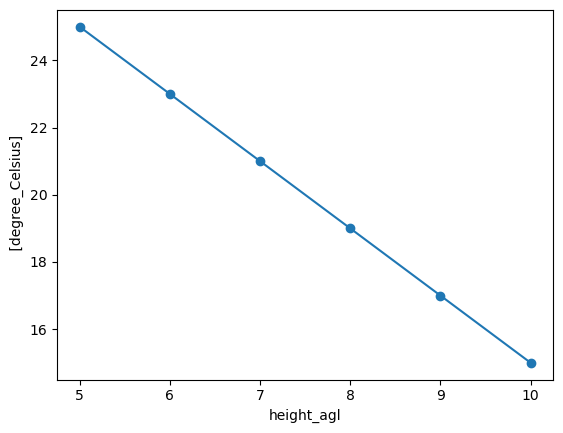

In [5]:
da.plot(marker = 'o')

In [6]:
from metpy.cbook import get_test_data

In [7]:
ds = xr.open_dataset(get_test_data('narr_example.nc', as_file_obj = False))
ds

<xarray.Dataset>
Dimensions:              (time: 1, isobaric: 29, y: 118, x: 292)
Coordinates:
  * time                 (time) datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+03 -3.054e+03 ... 678.9 711.4
  * x                    (x) float64 -3.977e+03 -3.945e+03 ... 5.47e+03
Data variables:
    Temperature          (time, isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
    u_wind               (time, isobaric, y, x) float32 ...
    v_wind               (time, isobaric, y, x) float32 ...
    Geopotential_height  (time, isobaric, y, x) float32 ...
    Specific_humidity    (time, isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

In [8]:
ds.coords

Coordinates:
  * time      (time) datetime64[ns] 1987-04-04T18:00:00
  * isobaric  (isobaric) float64 1e+03 975.0 950.0 925.0 ... 150.0 125.0 100.0
  * y         (y) float64 -3.087e+03 -3.054e+03 -3.022e+03 ... 646.4 678.9 711.4
  * x         (x) float64 -3.977e+03 -3.945e+03 ... 5.437e+03 5.47e+03